
## Wine Quality Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequalityN.csv to winequalityN (1).csv


In [ ]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
# check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

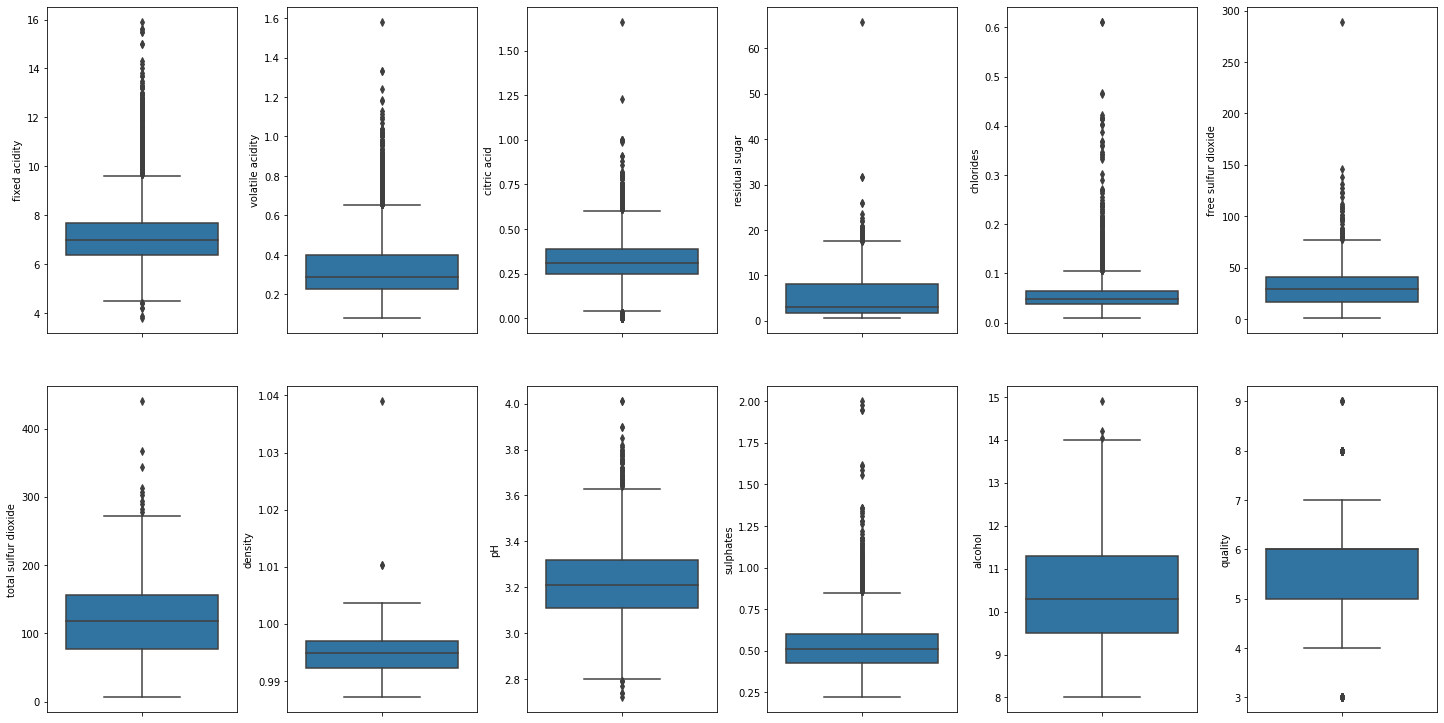

In [ ]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

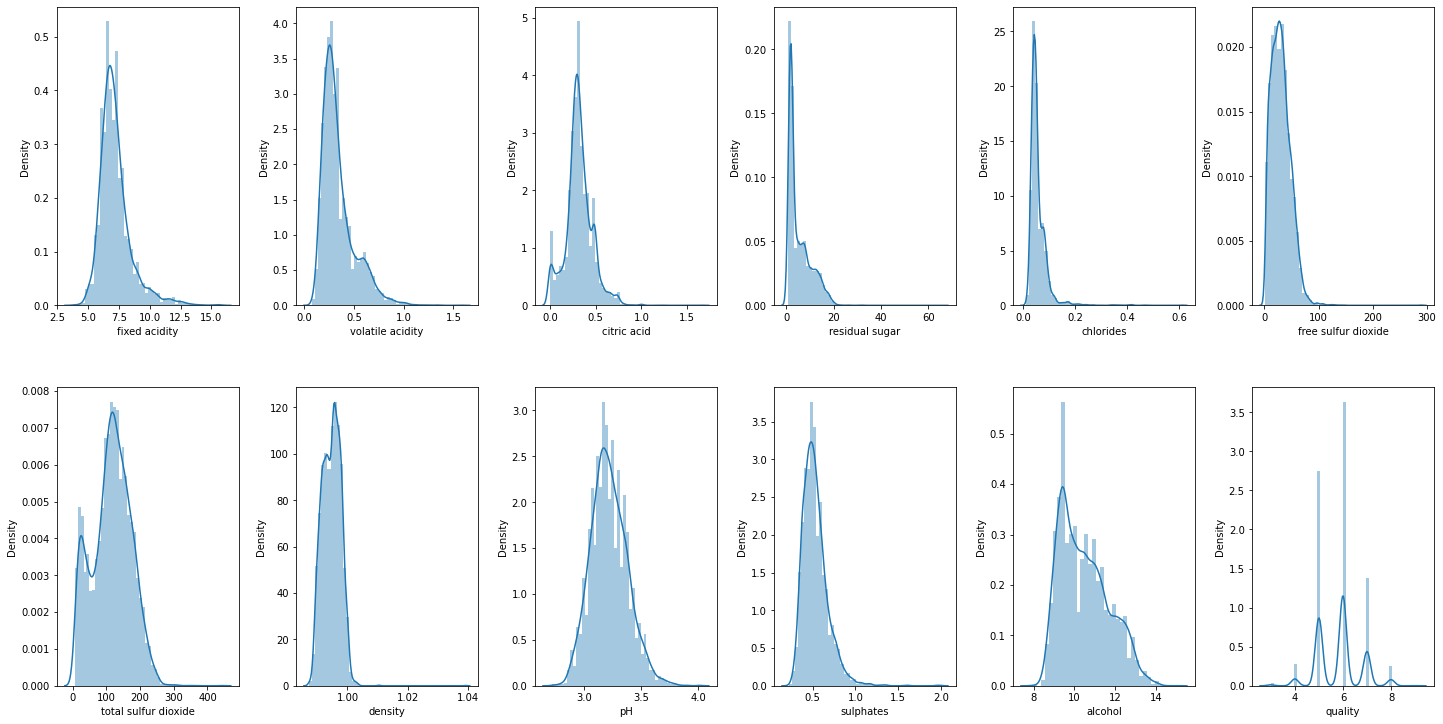

In [ ]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

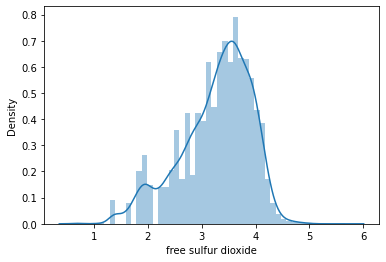

In [ ]:
sns.distplot(df['free sulfur dioxide'])

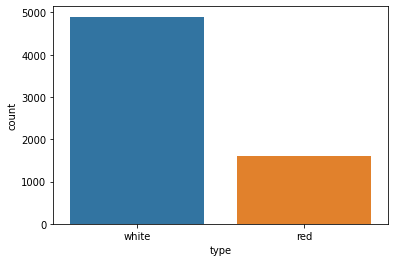

In [ ]:
sns.countplot(df['type'])

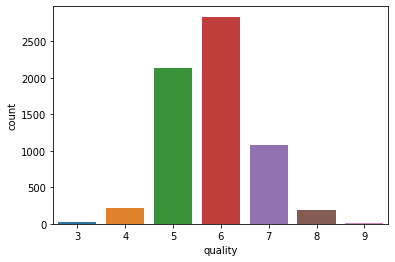

In [ ]:
sns.countplot(df['quality'])

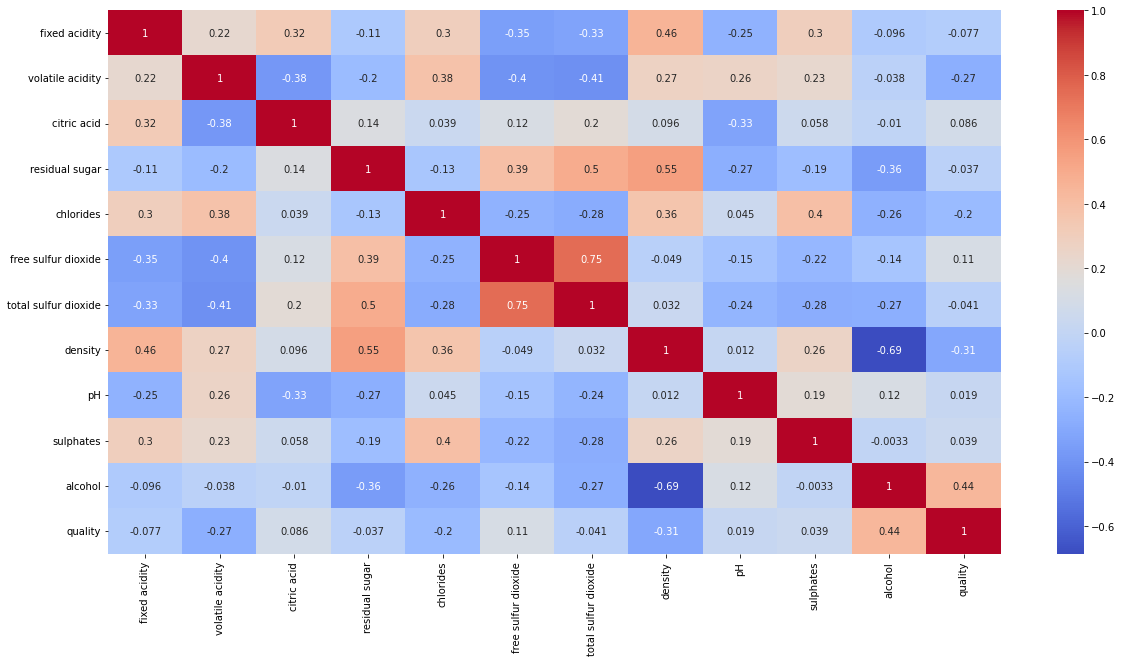

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Here we see that quality and alcohol content has high correlation

In [ ]:
X = df.drop(columns=['type', 'quality'])
y = df['quality']

### Class Imbalancement

In [ ]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
y.value_counts()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

In [ ]:
#Binarising the quality cloumn 'y' (here we have considered quality>=7 is good wine else not good)
y = y.apply(lambda x:1 if x>=7 else 0)

In [ ]:
y.value_counts()

0    5220
1    1277
Name: quality, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [ ]:
#splitting data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (4872, 11)
y_train:  (4872,)
x_test:  (1625, 11)
y_test:  (1625,)


### Model Training

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
l_pred = lr.predict(x_test)
l_acc = accuracy_score(l_pred, y_test)
print("Logistic Regression Accuracy: {:.2f}%".format(l_acc*100))
score = cross_val_score(lr, X, y, cv=5)
print("CV Score: {:.2f}%".format(np.mean(score)*100))

Logistic Regression Accuracy: 81.11%
CV Score: 80.13%


In [ ]:
print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1317
           1       0.50      0.19      0.27       308

    accuracy                           0.81      1625
   macro avg       0.67      0.57      0.58      1625
weighted avg       0.77      0.81      0.77      1625



TN:  1261
FN:  251
TP:  57
TF:  56


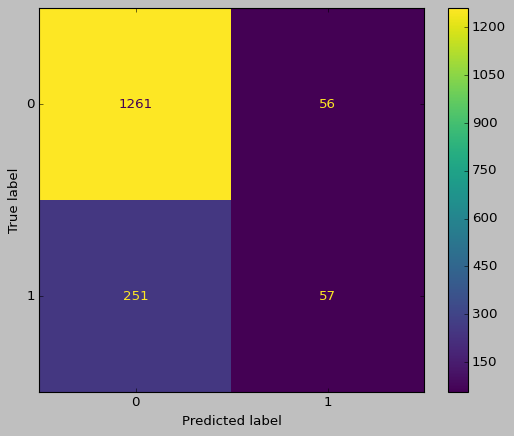

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, l_pred, labels = lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = lr.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
d_pred = dtree.predict(x_test)
d_acc = accuracy_score(d_pred, y_test)
print("Decision Tree Accuracy: {:.2f}%".format(d_acc*100))
score = cross_val_score(dtree, X, y, cv=5)
print("CV Score: {:.2f}%".format(np.mean(score)*100))

Decision Tree Accuracy: 83.26%
CV Score: 76.80%


In [ ]:
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1317
           1       0.56      0.59      0.58       308

    accuracy                           0.84      1625
   macro avg       0.73      0.74      0.74      1625
weighted avg       0.84      0.84      0.84      1625



TN:  1176
FN:  125
TP:  183
TF:  141


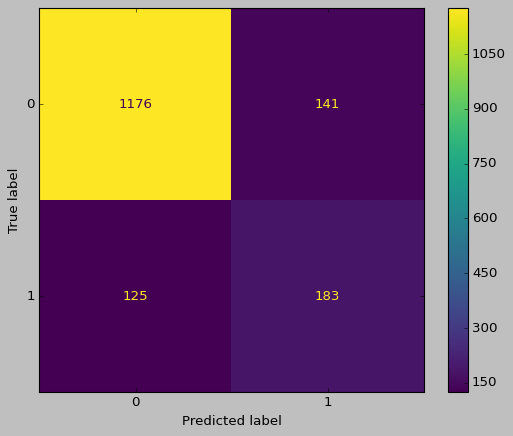

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, d_pred, labels = dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(rf_pred, y_test)
print("Random Forest Accuracy: {:.2f}%".format(rf_acc*100))
score = cross_val_score(rf, X, y, cv=5)
print("CV Score: {:.2f}%".format(np.mean(score)*100))

Random Forest Accuracy: 88.18%
CV Score: 82.05%


In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1317
           1       0.82      0.53      0.64       308

    accuracy                           0.89      1625
   macro avg       0.86      0.75      0.79      1625
weighted avg       0.88      0.89      0.88      1625



TN:  1282
FN:  146
TP:  162
TF:  35


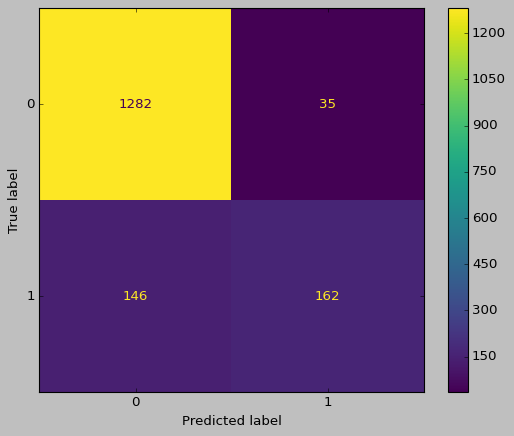

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, rf_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = rf.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train, y_train)
et_pred = et.predict(x_test)
et_acc = accuracy_score(et_pred, y_test)
print("Extra Trees Accuracy: {:.2f}%".format(et_acc*100))
score = cross_val_score(et, X, y, cv=5)
print("CV Score: {:.2f}%".format(np.mean(score)*100))

Extra Trees Accuracy: 88.31%
CV Score: 81.84%


In [ ]:
print(classification_report(y_test, et_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1317
           1       0.79      0.52      0.62       308

    accuracy                           0.88      1625
   macro avg       0.84      0.74      0.78      1625
weighted avg       0.88      0.88      0.87      1625



TN:  1275
FN:  149
TP:  159
TF:  42


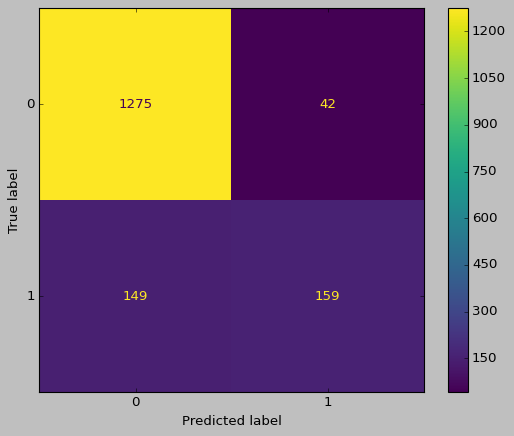

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, et_pred, labels = et.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = et.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

XGBoost

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)
xg_pred = xg.predict(x_test)
xg_acc = accuracy_score(xg_pred, y_test)
print("XGBoost Accuracy: {:.2f}%".format(xg_acc*100))
score = cross_val_score(xg, X, y, cv=5)
print("CV Score: {:.2f}%".format(np.mean(score)*100))

XGBoost Accuracy: 83.88%
CV Score: 81.36%


In [ ]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1317
           1       0.64      0.35      0.45       308

    accuracy                           0.84      1625
   macro avg       0.75      0.65      0.68      1625
weighted avg       0.82      0.84      0.82      1625



TN:  1255
FN:  200
TP:  108
TF:  62


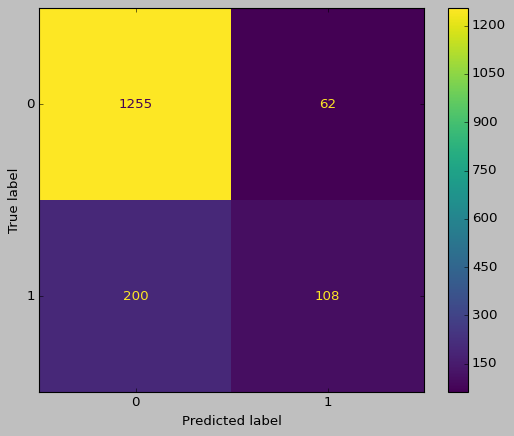

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, xg_pred, labels = xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = xg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

LightGBM

In [ ]:
import lightgbm 
lg = lightgbm.LGBMClassifier()
lg.fit(x_train, y_train)
lg_pred = lg.predict(x_test)
lg_acc = accuracy_score(lg_pred, y_test)
print("Decision Tree Accuracy: {:.2f}%".format(lg_acc*100))
score = cross_val_score(lr, X, y, cv=5)
print("CV Score: {:.2f}%".format(np.mean(score)*100))

Decision Tree Accuracy: 87.32%
CV Score: 80.13%


In [ ]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1317
           1       0.72      0.54      0.62       308

    accuracy                           0.87      1625
   macro avg       0.81      0.75      0.77      1625
weighted avg       0.86      0.87      0.87      1625



TN:  1253
FN:  142
TP:  166
TF:  64


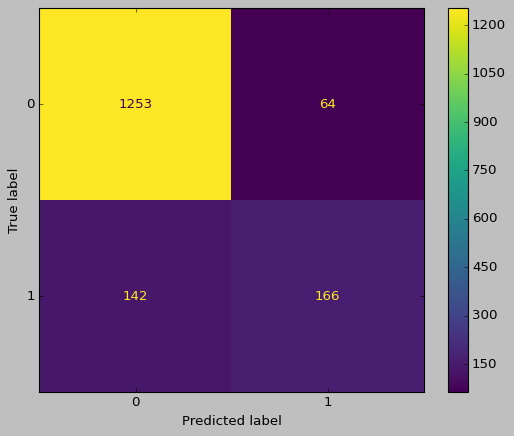

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, lg_pred, labels = lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = lg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])